In [1]:
data_path = "./BaZrS3/"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thermopot import materials, calculations, reactions, potentials, potential 


In [3]:
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/scan/aims.out")

BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
BaS2_calc  = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
BaS3_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P2_12_12/scan/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/scan/aims.out")

ZrS_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
ZrS_Fm_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")
ZrS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/scan/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/scan/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/scan/aims.out")

Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/scan/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/scan/aims.out")

S2_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S2/scan/aims.out",gas=True)
S8_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S8/scan/aims.out",gas=True)

In [4]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},"../BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)

BaS = materials.Solid("BaS", {"Ba":1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2", {"Ba":1, "S": 2},"../BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3_P4 = materials.Solid("BaS3", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P-421m.dat",calculation=BaS3_P4_calc)
BaS3_P2 = materials.Solid("BaS3_P2", {"Ba":1, "S": 3},"../BaZrS3/phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3", {"Ba":2, "S": 3},"../BaZrS3/phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

ZrS_P4 = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_P4_nmm.dat",calculation=ZrS_P4_calc)
ZrS_Fm = materials.Solid("ZrS2",{"Zr": 1,"S": 1},"../BaZrS3/phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_Fm_calc)
ZrS3_P2 = materials.Solid("ZrS2",{"Zr": 1,"S": 3},"../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_P2_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},"../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
Zr3S4 = materials.Solid("ZrS2",{"Zr": 3,"S": 4},"../BaZrS3/phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)

S8 = materials.IdealGas("S8",{'S':8},"../BaZrS3/nist_janaf/S8.dat",calculation=S8_calculation,zpe_lit=0.39)
S2 = materials.IdealGas("S2",{'S':2},"../BaZrS3/nist_janaf/S2.dat",calculation=S2_calculation,zpe_lit=0.047)

Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S =  materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",calculation=S_calc)

S_g = materials.Sulfur_model(S8_calculation.energy/8) 

In [5]:
T = np.linspace(400,1273,1000) # K
P = np.array( np.logspace(0,7,1000),ndmin=2).transpose() # Pa  

Text(250, 100000, 'BaS$_3$')

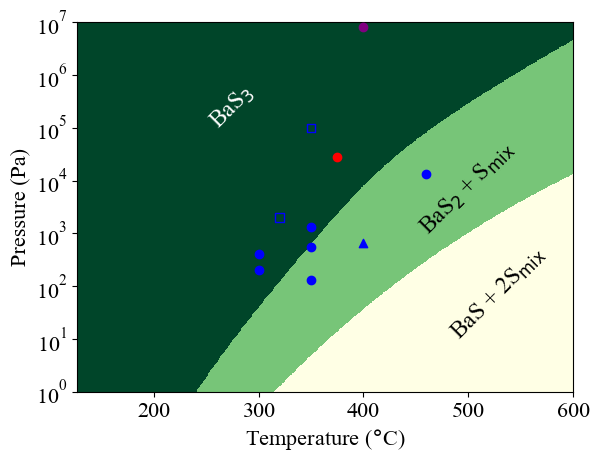

In [24]:
BaS_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS:8,S_g:16},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS2:8,S_g:8},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],log_scale=True,T_units="C")
plt.xlim(127,600)
plt.ylim(10**0,10**7)
plt.scatter(x=400,y=8*10**6,zorder=23,color='purple',marker='o')
plt.scatter(x=375,y=0.28*10**5,zorder=23,color='red',marker='o')
plt.scatter(x=350,y=2*2.7*10**2,zorder=23,marker='o',color='b')   # BaS3
plt.scatter(x=350,y=13.3*10**2,zorder=23,marker='o',color='b')
plt.scatter(x=300,y=2*10**2,zorder=23,marker='o',color='b')
plt.scatter(x=350,y=1.3*10**2,zorder=23,marker='o',color='b')
plt.scatter(x=300,y=4*10**2,zorder=23,marker='o',color='b')
plt.scatter(x=460,y=133*10**2,zorder=23,marker='o',color='b')   
plt.scatter(x=400,y=6.7*10**2,zorder=23,marker='^',color='b')    # BaS2
plt.scatter(x=350,y=1000*10**2,zorder=23,marker='s',facecolors='none', edgecolors='b')   # BaS
plt.scatter(x=320,y=20*10**2,zorder=23,marker='s',facecolors='none', edgecolors='b')
plt.yscale('log')
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.minorticks_off()
plt.text(480, 10, 'BaS + 2S$_\mathrm{mix}$', rotation =45,fontsize = 17,zorder=25) 
plt.text(450, 1000, 'BaS$_2$ + S$_\mathrm{mix}$', fontsize = 17,zorder=25,rotation=45) 
plt.text(250, 100000, 'BaS$_3$', fontsize = 17,zorder=25,rotation=45,color='w') 
plt.savefig('Fig4a.png',bbox_inches='tight')


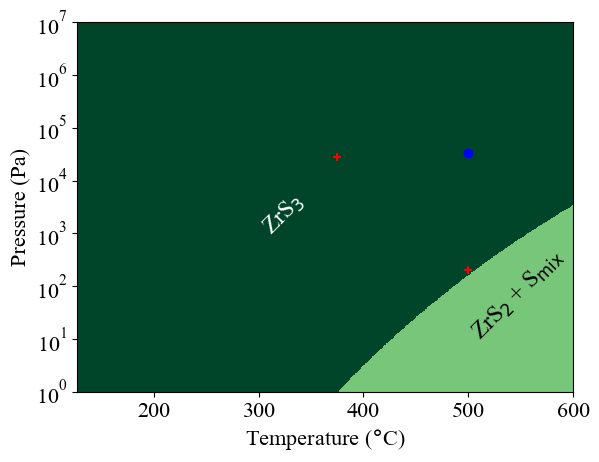

In [7]:
ZrS_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS_P4:8,S_g:16},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS2:8,S_g:8},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS3_P2:8},temperature=T,pressure=P,fu=8)
#ZrS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-4,-1],precision="%.2f")
#ZrS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
#ZrS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
ZrS_system = potentials.Potentials(ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C",melting_point=True)
plt.scatter([785,814,847,874],[7E3,1.3E4,2.4E4,4.1E4],color='r',zorder=34)
plt.scatter(500,0.33E5,color='b',zorder=43)
plt.scatter(x=375,y=0.28*10**5,zorder=23,color='r',marker='+')
plt.scatter(x=500,y=2E2,zorder=23,color='r',marker='+')
plt.xlim(127,600)
plt.ylim(10**0,10**7)
plt.yticks([1,10,100,1000,10000,100000,1000000,10000000])
plt.minorticks_off()
plt.text(500, 10, 'ZrS$_2$ + S$_\mathrm{mix}$', fontsize = 17,zorder=25,rotation=45) 
plt.text(300, 1000, 'ZrS$_3$', fontsize = 17,zorder=25,rotation=45,color='w') 
plt.savefig('Fig4b.png',bbox_inches='tight')